# Dataset: 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [77]:
import pandas as pd
import numpy as np
from sklearn import linear_model, tree, ensemble, decomposition, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.max_columns = 1000

%matplotlib inline

In [10]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [13]:
del df["Id"]
df = df[~df.SalesPrice.isnull()]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [15]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True).values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(alpha=0.1,
                                      random_state=1,
                                      l1_ratio=1,
                                      max_iter=1000))
])



pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.010006, test: 0.024337
R2: train: 0.931719, test: 0.871224


In [25]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
columns = X.columns
X = X.values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeRegressor(max_depth=6,
                                      random_state=1))
])



pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.016310, test: 0.040577
R2: train: 0.888706, test: 0.785297


In [23]:
est = pipe.steps[-1][-1]

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = columns, filled=True)
!dot -Tpng tree.dot -o tree.png

In [26]:
pd.DataFrame({"feature": columns, 
              "importance": est.feature_importances_}).sort_values("importance", 
                                                                   ascending = False)

,feature,importance
3,OverallQual,0.541564
15,GrLivArea,0.124963
25,GarageCars,0.091242
8,BsmtFinSF1,0.046051
5,YearBuilt,0.043168
11,TotalBsmtSF,0.028536
194,CentralAir_Y,0.018410
1,LotFrontage,0.011309
4,OverallCond,0.010356
6,YearRemodAdd,0.009748


In [28]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
columns = X.columns
X = X.values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestRegressor(max_depth=6,
                                      random_state=1))
])



pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.012422, test: 0.030786
R2: train: 0.915237, test: 0.837103


In [32]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
columns = X.columns
X = X.values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.GradientBoostingRegressor(max_depth=6,
                                      random_state=1))
])



pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))

MSE: train: 0.000362, test: 0.022323
R2: train: 0.997529, test: 0.881882


In [33]:
est = pipe.steps[-1][-1]

In [34]:
pd.DataFrame({"feature": columns, 
              "importance": est.feature_importances_}).sort_values("importance", 
                                                                   ascending = False)

,feature,importance
3,OverallQual,0.110492
15,GrLivArea,0.078747
2,LotArea,0.047016
8,BsmtFinSF1,0.037483
26,GarageArea,0.036870
10,BsmtUnfSF,0.033959
11,TotalBsmtSF,0.028167
12,1stFlrSF,0.025669
5,YearBuilt,0.025201
1,LotFrontage,0.024585


In [35]:
from sklearn import feature_selection

In [39]:
f_stats, p_vals = feature_selection.f_regression(X, y)

In [ ]:
# For significant features, pval < 0.01, lower the value better.

In [42]:
pd.DataFrame({"feature": columns, "pval": p_vals}).sort_values("pval")

,feature,pval
3,OverallQual,0.000000e+00
15,GrLivArea,3.060209e-216
25,GarageCars,3.093756e-199
26,GarageArea,1.106255e-176
11,TotalBsmtSF,7.534551e-151
12,1stFlrSF,1.074698e-141
151,ExterQual_TA,4.749723e-141
18,FullBath,2.118958e-140
5,YearBuilt,1.103567e-135
24,GarageYrBlt,7.405437e-126


In [63]:
weights = []

for alpha in 10 ** np.linspace(-2, 0, 10):
    pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=alpha,
                                      random_state=1,
                                      max_iter=1000))
    ])

    pipe.fit(X_train, y_train)
    weights.append(pipe.steps[-1][-1].coef_)


In [64]:
weights = pd.DataFrame(weights, columns=columns, index=np.linspace(-2, 2, 10))

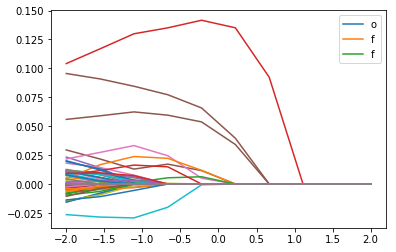

In [65]:
weights.plot()
plt.legend("off")

In [73]:
pipe = pipeline.Pipeline([
("scaler", preprocessing.StandardScaler()),
("est", linear_model.Lasso(alpha=0.01,
                                  random_state=1,
                                  max_iter=1000))
])

pipe.fit(X_train, y_train)
pipe.steps[-1][-1].coef_

array([-0.01496146, -0.        ,  0.01185919,  0.10413487,  0.02330874,
        0.02946514,  0.02171262,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.00472336,  0.00772163,  0.        , -0.        ,
        0.09556319,  0.01803006,  0.        ,  0.01199834,  0.        ,
        0.        , -0.00227499,  0.01120831,  0.00815855,  0.        ,
        0.05589592,  0.        ,  0.01084966,  0.00460384,  0.        ,
        0.        ,  0.00599374, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.02643172,
        0.        ,  0.        ,  0.        ,  0.        , -0.00044357,
       -0.00159326,  0.        ,  0.        ,  0.        ,  0.00751756,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.00283564,  0.        ,
        0.01948933, -0.00664952, -0.        , -0.        , -0.00036926,
       -0.        , -0.        , -0.        , -0.        ,  0.00

In [74]:
res = pd.DataFrame({
    "feature": columns,
    "weight": pipe.steps[-1][-1].coef_
})

In [75]:
res[res.weight>0]

,feature,weight
2,LotArea,0.011859
3,OverallQual,0.104135
4,OverallCond,0.023309
5,YearBuilt,0.029465
6,YearRemodAdd,0.021713
11,TotalBsmtSF,0.004723
12,1stFlrSF,0.007722
15,GrLivArea,0.095563
16,BsmtFullBath,0.018030
18,FullBath,0.011998


In [76]:
X.shape

(1460, 258)

In [78]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [79]:
pca = decomposition.PCA()
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

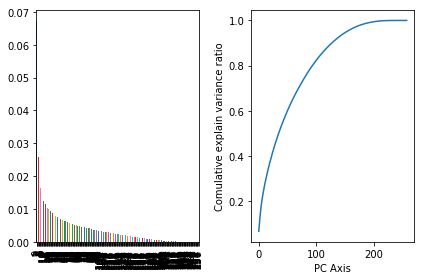

In [92]:
plt.subplot(1, 2, 1)
pd.Series(pca.explained_variance_ratio_).plot.bar()
plt.subplot(1, 2, 2)
plt.xticks()
plt.ylabel("Explain variance ratio")
plt.xlabel("PC Axis")

pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot()
plt.ylabel("Comulative explain variance ratio")
plt.xlabel("PC Axis")


plt.tight_layout()

In [95]:
pd.DataFrame({"total": np.cumsum(pca.explained_variance_ratio_)}).query("total>0.99").iloc[:10,:]

,total
191,0.990123
192,0.990671
193,0.991193
194,0.991700
195,0.992199
196,0.992689
197,0.993150
198,0.993589
199,0.994012
200,0.994427


In [97]:
pca = decomposition.PCA(n_components=190, random_state=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [110]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
columns = X.columns
X = X.values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(n_components=190, random_state=1)),
    ("est", ensemble.GradientBoostingRegressor(max_depth=4,
                                      random_state=1))
])



pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))

MSE: train: 0.001303, test: 0.031375
R2: train: 0.991107, test: 0.833984
